In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
warnings.filterwarnings('ignore')


In [2]:
#Load dữ liệu giá chứng khoán Microsoft Price từ file CSV
df = pd.read_csv("./Data/MSFT.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.071132,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.073673,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.074943,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.073038,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.071768,47894400


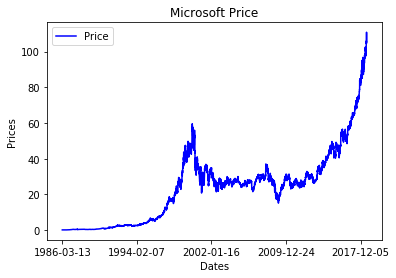

In [7]:
#Vẽ biểu đồ giá chứng khoán
plt.title("Microsoft Price")
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Price')
plt.xticks(np.arange(0,8162,2000), df['Date'][0:8162:2000])
plt.legend()

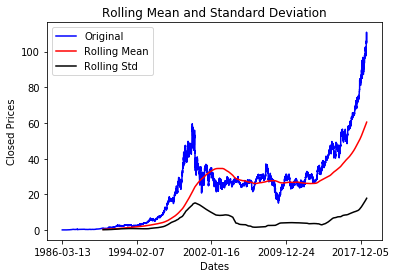

In [8]:
#Kiểm tra tính dừng cuả chuổi giá chứng khoán
def test_stationary(timeseries):

    #Determing rolling statistics
    closedPrice = timeseries['Close']
    rolmean = closedPrice.rolling(window = 3 * 365).mean()
    rolstd = closedPrice.rolling(window = 3 * 365).std()

    #Plot rolling statistics
    orig = plt.plot(closedPrice, color ='blue',label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.title("Microsoft Price")
    plt.xlabel('Dates')
    plt.xticks(np.arange(0, 8162, 2000), timeseries['Date'][0:8162:2000])
    plt.ylabel('Closed Prices')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    
test_stationary(df)

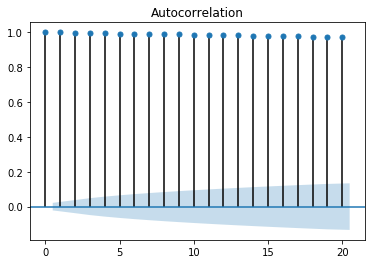

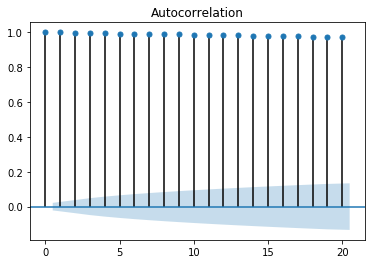

In [9]:
#Khảo sát hàm tự quan của chuỗi
plot_acf(df['Close'], lags = 20)

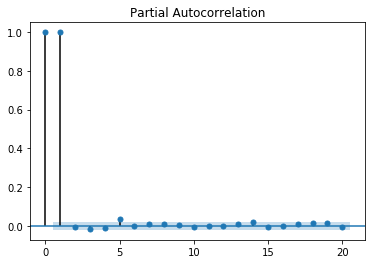

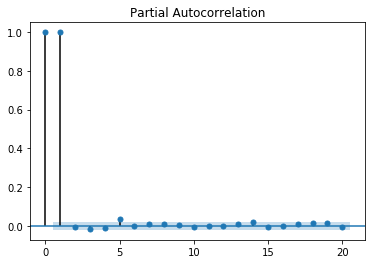

In [10]:
#Khảo sát hàm tự quan riêng phần của chuỗi
plot_pacf(df['Close'], lags = 20)

In [11]:
#Chia tập dữ liệu thành 2 phần training và test
train_data, test_data = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

In [12]:
#Huấn luyện dữ liệu
history = [x for x in train_ar]
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

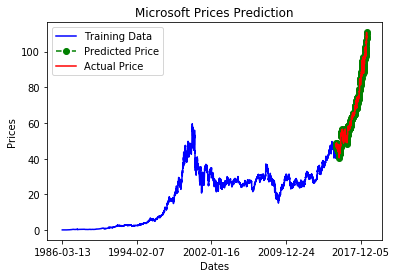

In [13]:
#Vẽ biểu đồ mô hình dự đoán
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,8162, 2000), df['Date'][0:8162:2000])
plt.legend()

In [20]:
#Đánh giá mô hình
mse_error = mean_squared_error(test_ar, predictions)
mae_error = mean_absolute_error(test_ar, predictions)
r2 = r2_score(test_ar, predictions)

print('Testing Mean Squared Error: %.3f' % mse_error)
print('Testing Mean Absolute Error: %.3f' % mae_error)
print('Testing R^2: %.3f' % r2)

Testing Mean Squared Error: 0.860
Testing Mean Absolute Error: 0.620
Testing R^2: 0.997
